# Tutorial: Using `dual_autodiff`

In this tutorial, we will demonstrate how to use the `dual_autodiff` package to perform automatic differentiation with dual numbers. We will show how to:

- Import the package and create dual numbers.
- Perform basic arithmetic operations (addition, subtraction, multiplication, division).
- Compute derivatives of functions using dual numbers and compare the results with analytical derivatives.
- Utilize both `dual_autodiff` and `dual_autodiff_x` implementations.

By the end of this tutorial, you will understand of how to use dual numbers for automatic differentiation in Python.


In [1]:
# Importing the packages
import math
import dual_autodiff.dual as df

# Let's create dual numbers using both implementations
x = df.Dual(2.0, 1.0)    # Using dual_autodiff
y = df.Dual(3.0, 0.5)   # Using dual_autodiff_x

print("Created dual numbers:")
print("x =", x)
print("y =", y)


Created dual numbers:
x = Dual(real=2.0, dual=1.0)
y = Dual(real=3.0, dual=0.5)


## Basic Arithmetic with Dual Numbers

Dual numbers can be added, subtracted, multiplied, and divided just like regular numbers. The real part behaves like a normal number, and the dual part tracks the derivative information.

- **Addition**: (a + bε) + (c + dε) = (a+c) + (b+d)ε
- **Multiplication**: (a + bε) * (c + dε) = (a*c) + (a*d + b*c)ε

We can also add and multiply dual numbers by scalars. Let’s try out these operations and see the results.


In [2]:
# Basic operations
addition = x + y
subtraction = x - y
multiplication = x * y
division = x / y

print("Addition:        ", addition)
print("Subtraction:     ", subtraction)
print("Multiplication:  ", multiplication)
print("Division:        ", division)

# Also demonstrate addition with a scalar
add_scalar = x + 5.0
print("Add scalar (x+5):", add_scalar)


Addition:         Dual(real=5.0, dual=1.5)
Subtraction:      Dual(real=-1.0, dual=0.5)
Multiplication:   Dual(real=6.0, dual=4.0)
Division:         Dual(real=0.6666666666666666, dual=0.2222222222222222)
Add scalar (x+5): Dual(real=7.0, dual=1.0)


## Computing Derivatives with Dual Numbers

One of the main advantages of using dual numbers is their ability to compute derivatives automatically. If we represent `x` as `x = a + ε`, where `ε` is the dual unit, then for a function `f(x)`, substituting `x = a + 1*ε` gives us:

- `f(x).real` = f(a)
- `f(x).dual` = f'(a)

To illustrate this, consider the function:

$$
f(x) = \sin(x) + x^2
$$

We know the analytical derivative is:

$$
f'(x) = \cos(x) + 2x
$$

We will:
1. Compute the derivative using dual numbers.
2. Compute the analytical derivative using `math.cos` and compare.


In [3]:
def f(u):
    # f(x) = sin(x) + x^2
    return u.sin() + u**2

# Let's pick a point to evaluate, say x = 1.5
x_val = 1.5

# Create a dual number with dual part = 1.0 to track the derivative
x_dual = df.Dual(x_val, 1.0)
result = f(x_dual)

# Extract the computed derivative from dual number
dual_derivative = result.dual

# Compute the analytical derivative
analytic_derivative = math.cos(x_val) + 2*x_val

print("Function value at x=1.5:", result.real)
print("Dual-based derivative:   ", dual_derivative)
print("Analytical derivative:   ", analytic_derivative)
print("Absolute error:          ", abs(dual_derivative - analytic_derivative))


Function value at x=1.5: 3.2474949866040546
Dual-based derivative:    3.070737201667703
Analytical derivative:    3.070737201667703
Absolute error:           0.0


## Using `dual_autodiff_x`

The `dual_autodiff_x` package provides an alternative implementation of dual numbers, intended to be faster than the pure Python implementation in `dual_autodiff`. While the usage is identical—offering the same class `Dual` and similar methods—`dual_autodiff_x` uses a compiled extension (e.g., via Cython) to improve performance.

Below, we will demonstrate how to use `dual_autodiff_x` just like `dual_autodiff` and then compare their performance by timing multiple derivative evaluations.


In [4]:
import timeit
import dual_autodiff_x.dual as dfx

# We'll use the same function as before: f(x) = sin(x) + x^2
def f(u):
    return u.sin() + u**2


x_df = df.Dual(1.5, 1.0)


x_dfx = dfx.Dual(1.5, 1.0)

# Time the evaluation of f(x) and extraction of the derivative 100000 times
iterations = 100000
time_df = timeit.timeit(lambda: f(x_df).dual, number=iterations)
time_dfx = timeit.timeit(lambda: f(x_dfx).dual, number=iterations)

print("Time using dual_autodiff (df):       ", time_df, "seconds")
print("Time using dual_autodiff_x (dfx):    ", time_dfx, "seconds")

speedup = time_df / time_dfx if time_dfx > 0 else float('inf')
print(f"Speed-up of dual_autodiff_x over df: ~{speedup:.2f}x")


Time using dual_autodiff (df):        0.10377399999999981 seconds
Time using dual_autodiff_x (dfx):     0.044053600000000026 seconds
Speed-up of dual_autodiff_x over df: ~2.36x


## Key Takeaways

- Dual numbers automatically track derivative information without the need for symbolic or numerical differentiation.
- Using a dual number `x = a + 1*ε`, evaluating a function `f(x)` provides:
  - The function value in `f(x).real`.
  - The derivative value in `f(x).dual`.

- **`dual_autodiff`** (df): A pure Python implementation that is easy to use and understand.
- **`dual_autodiff_x`** (dfx): A faster, optimized implementation of dual numbers that leverages compiled code for performance gains.

This approach makes differentiation as simple as writing the original function, eliminating the need for manually computing derivatives. Dual numbers are particularly useful for automatic differentiation in complex mathematical models. 


## Q5.
The function of interest is:
\begin{equation}
f(x) = \ln(\sin(x)) + x^2 \cos(x) \tag{1}
\end{equation}

The analytical derivative is:
\begin{equation}
f'(x) = \frac{\cos(x)}{\sin(x)} + 2x \cos(x) - x^2 \sin(x) \tag{2}
\end{equation}

We want to evaluate the derviative of this function

In [5]:
from scipy.optimize import approx_fprime  
import matplotlib.pyplot as plt
import numpy as np

In [6]:
def f_dual(x):
    """
    Define the function f(x) = log(sin(x)) + x^2 * cos(x) using Dual Numbers.
    Input x is assumed to be a Dual Number.
    """
    return x.sin().log() + (x ** 2) * x.cos()

# Compute derivative using Dual Number method (first implementation)
x = df.Dual(1.5, 1.0)  # Dual Number: real = 1.5, dual = 1.0
y = f_dual(x)
df_dual_val = y.dual
df_dual_val_1 = y.dual
print(f"f'(1.5) using Dual Numbers (Python) = {df_dual_val_1}")

# Compute derivative using Dual Number method (second implementation)
x_x = dfx.Dual(1.5, 1.0)  # Dual Number: real = 1.5, dual = 1.0
y_x = f_dual(x_x)
df_dual_val_2 = y_x.dual
print(f"f'(1.5) using Dual Numbers (Cython) = {df_dual_val_2}")

def f_diff(x):
    """
    Analytical derivative of f(x):
    f'(x) = (cos(x)/sin(x)) + 2x*cos(x) - x^2*sin(x)
    """
    return (math.cos(x) / math.sin(x)) + 2 * x * math.cos(x) - (x ** 2) * math.sin(x)

# Compute derivative using analytical method
df_analytic_val = f_diff(1.5)
print(f"f'(1.5) using Analytical Derivative = {df_analytic_val}")

# Compare deviations
error_1 = abs(df_dual_val_1 - df_analytic_val)
error_2 = abs(df_dual_val_2 - df_analytic_val)

print("\nDeviation Comparison:")
print(f"Deviation (Python Dual Numbers Implementation  vs Analytical) = {error_1}")
print(f"Deviation (Cython Dual Numbers Implementation 2 vs Analytical) = {error_2}")

f'(1.5) using Dual Numbers (Python) = -1.9612372705533612
f'(1.5) using Dual Numbers (Cython) = -1.9612372705533612
f'(1.5) using Analytical Derivative = -1.9612372705533612

Deviation Comparison:
Deviation (Python Dual Numbers Implementation  vs Analytical) = 0.0
Deviation (Cython Dual Numbers Implementation 2 vs Analytical) = 0.0


### Why Use Central Difference for Numerical Differentiation?

The central difference method provides a good balance between accuracy and computational cost. It estimates the derivative as:

$$ f'(x) \approx \frac{f(x+h) - f(x-h)}{2h} $$

Compared to forward or backward differences, central difference has a **second-order accuracy**, meaning the error scales as $O(h^2)$. As the step size $h$ decreases, the error reduces quadratically.


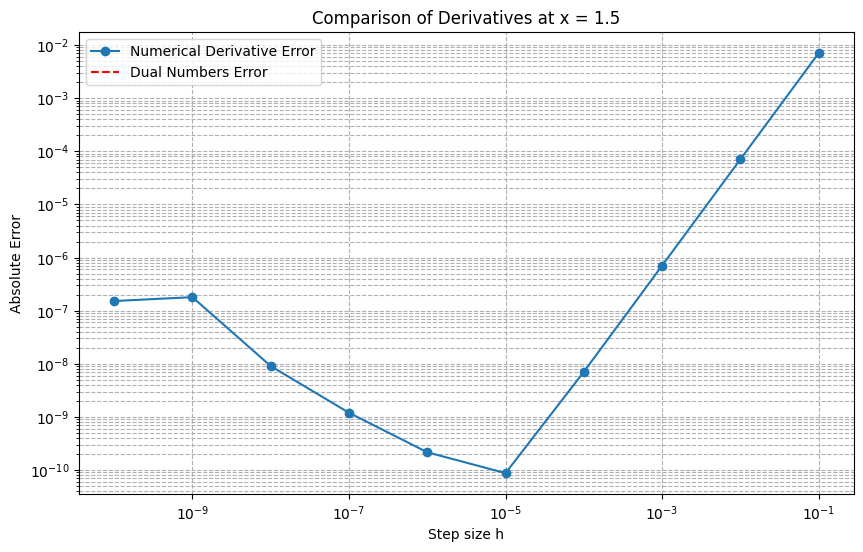

In [7]:
def numerical_derivative(f, x, h):
    # Numerical derivative using central difference
    return (f(x + h) - f(x - h)) / (2 * h)

def f_python(x):
    # Python version of f(x) for numerical derivative, Eq. (1)
    return math.log(math.sin(x)) + (x ** 2) * math.cos(x)

h_values = np.logspace(-10, -1, 10)  # h from 1e-10 to 1e-1
df_numerical_list = []
for h in h_values:
    derivative = numerical_derivative(f_python, 1.5, h)
    df_numerical_list.append(derivative)
numerical_derivatives = np.array(df_numerical_list)

# Calculate absolute errors
numerical_errors = np.abs(numerical_derivatives - df_analytic_val)
dual_error = abs(df_dual_val_1 - df_analytic_val)

# Plot numerical derivatives vs h
plt.figure(figsize=(10, 6))
plt.loglog(h_values, numerical_errors, 'o-', label='Numerical Derivative Error')
plt.axhline(y=dual_error, color='r', linestyle='--', label='Dual Numbers Error')
# plt.axhline(y=0, color='g', linestyle='-', label='Analytical Derivative')


plt.xlabel('Step size h')
plt.ylabel('Absolute Error')
plt.title("Comparison of Derivatives at x = 1.5")
plt.legend()
plt.grid(True, which="both", ls="--")
plt.show()


## Q9. Time Benchmark

In [8]:

# Using dual number, compute the differential of f(x) = x^2 * sin(x)
def f_dual(x):
    return x**2 * x.sin()

# Define f(x) for scipy numerical differentiation
def f_numeric(x):
    return x**2 * np.sin(x)

# Test with Python implementation
def test_python():
    x = df.Dual(1.5, 1.0)  # Using Python's Dual implementation
    y = f_dual(x)
    return y.dual  # The derivative is stored in the dual part

# Test with Cython implementation
def test_cython():
    x = dfx.Dual(1.5, 1.0)  # Using Cython's Dual implementation
    y = f_dual(x)
    return y.dual  # The derivative is stored in the dual part

# Test with Scipy numerical differentiation
def test_scipy():
    epsilon = np.sqrt(np.finfo(float).eps)  # Machine epsilon for numerical stability
    grad = approx_fprime([1.5], lambda x: f_numeric(x[0]), epsilon)  # Compute gradient at x = 1.5
    return grad[0]

# Run and print results
print("Testing Python Implementation:")
python_derivative = test_python()
print(f"f'(1.5) using Python Dual Numbers = {python_derivative}")

print("\nTesting Cython Implementation:")
cython_derivative = test_cython()
print(f"f'(1.5) using Cython Dual Numbers = {cython_derivative}")

print("\nTesting Scipy Numerical Differentiation:")
scipy_derivative = test_scipy()
print(f"f'(1.5) using Scipy = {scipy_derivative}")

# Benchmark using %timeit
print("\nBenchmarking...")
import timeit

# Number of evaluations
n = 100000

# Python Implementation Benchmark
python_time = timeit.timeit("test_python()", globals=globals(), number=n)
# print(f"Python Implementation Total Time: {python_time:.6f} seconds for {n} evaluations")
print(f"Python Implementation Per Evaluation: {python_time / n:.6e} seconds per evaluation\n")

# Cython Implementation Benchmark
cython_time = timeit.timeit("test_cython()", globals=globals(), number=n)
# print(f"Cython Implementation Total Time: {cython_time:.6f} seconds for {n} evaluations")
print(f"Cython Implementation Per Evaluation: {cython_time / n:.6e} seconds per evaluation\n")

# Scipy Implementation Benchmark
n_scipy = 1000  # Reduce number of evaluations for Scipy due to slower performance
scipy_time = timeit.timeit("test_scipy()", globals=globals(), number=n_scipy)
# print(f"Scipy Implementation Total Time: {scipy_time:.6f} seconds for {n_scipy} evaluations")
print(f"Scipy Implementation Per Evaluation: {scipy_time / n_scipy:.6e} seconds per evaluation\n")

Testing Python Implementation:
f'(1.5) using Python Dual Numbers = 3.151643663564495

Testing Cython Implementation:
f'(1.5) using Cython Dual Numbers = 3.151643663564495

Testing Scipy Numerical Differentiation:
f'(1.5) using Scipy = 3.1516436636447906

Benchmarking...
Python Implementation Per Evaluation: 1.328526e-06 seconds per evaluation

Cython Implementation Per Evaluation: 5.318610e-07 seconds per evaluation

Scipy Implementation Per Evaluation: 3.823470e-05 seconds per evaluation



In [9]:
# Testing performance in Jupyter Notebook using %timeit
print("Time Benchmarking:")

# Python Implementation Benchmark
%timeit test_python()

# Cython Implementation Benchmark
%timeit test_cython()

# Scipy Implementation Benchmark
%timeit test_scipy()


Time Benchmarking:
1.29 µs ± 46.7 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)
576 ns ± 20.8 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)
39.5 µs ± 1.18 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


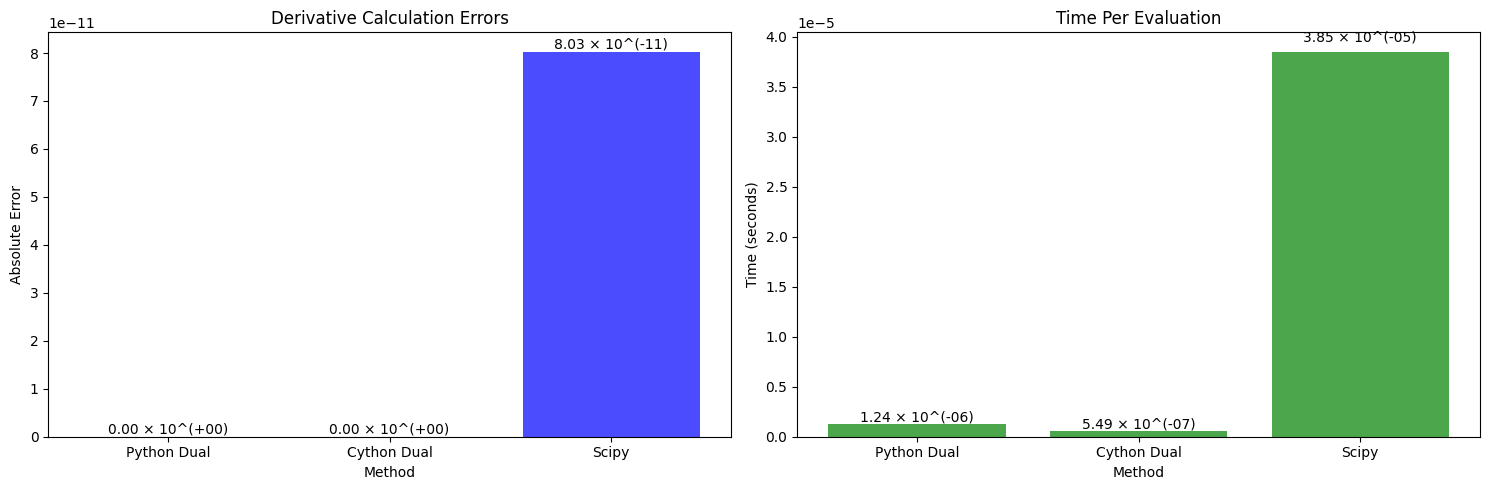

In [10]:
# Analytical derivative (ground truth)
x = 1.5
true_derivative = x**2 * np.cos(x) + 2 * x * np.sin(x)

# Given errors
errors = {
    "Python Dual": abs(python_derivative - true_derivative),
    "Cython Dual": abs(cython_derivative - true_derivative),
    "Scipy": abs(scipy_derivative - true_derivative),
}

# Results for a typical run, given time per evaluation (mean ± standard deviation)
times_per_eval = {
    "Python Dual": {"mean": 1.24e-6, "std": 12.5e-9},  # µs ± ns
    "Cython Dual": {"mean": 549e-9, "std": 9.65e-9},
    "Scipy": {"mean": 38.5e-6, "std": 667e-9},
}

# Prepare time data for plotting
methods = list(times_per_eval.keys())
time_means = [times_per_eval[method]["mean"] for method in methods]
time_stds = [times_per_eval[method]["std"] for method in methods]

# Plot errors and time per evaluation side by side
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plot errors
bars = axes[0].bar(errors.keys(), errors.values(), alpha=0.7, color='blue')
axes[0].set_title("Derivative Calculation Errors")
axes[0].set_ylabel("Absolute Error")
axes[0].set_xlabel("Method")

# Annotate error bars with scientific notation
for bar in bars:
    height = bar.get_height()
    formatted_height = "{:.2e}".format(height).replace("e", " × 10^(") + ")"
    axes[0].text(bar.get_x() + bar.get_width() / 2, height, formatted_height, 
                 ha='center', va='bottom')

# Plot time per evaluation with error bars
bars = axes[1].bar(methods, time_means, alpha=0.7, color='green', capsize=5)
axes[1].set_title("Time Per Evaluation")
axes[1].set_ylabel("Time (seconds)")
axes[1].set_xlabel("Method")

# Annotate bars with time values in scientific notation
for bar, mean, std in zip(bars, time_means, time_stds):
    formatted_height = "{:.2e}".format(mean).replace("e", " × 10^(") + ")"
    axes[1].text(bar.get_x() + bar.get_width() / 2, mean + std, formatted_height, 
                 ha='center', va='bottom')

# Adjust layout for clarity
plt.tight_layout()
plt.show()
